In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

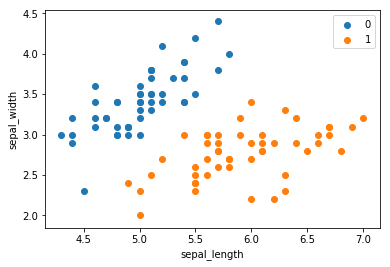

In [4]:
plt.scatter(df[:50]['sepal_length'], df[:50]['sepal_width'], label='0')
plt.scatter(df[50:100]['sepal_length'], df[50:100]['sepal_width'], label='1')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

In [5]:
data = df.iloc[:100, [0, 1, -1]]
X = data.loc[:, ['sepal_length', 'sepal_width']].values  # 将df转化成ndarray
y = data.loc[:, 'label'].values
y = np.array([1 if i == 1 else -1 for i in y])

In [6]:
class PerceptronClassifier(object):
    def __init__(self):
        self.w = 0
        self.b = 0
        self.learning_rate = 0.1

    def cal_y(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        self.w = np.zeros(X_train.shape[1], dtype=np.float32)
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.cal_y(X, self.w, self.b) <= 0:
                    self.w = self.w + self.learning_rate * y * X
                    self.b = self.b + self.learning_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
                self.fitted = True
        print('Perceptron Model Fit Success!')

    def predict(self, X):
        if not hasattr(self, 'fitted'):
            raise ValueError('This PerceptronClassifier instance is not fitted yet')
        y_pred = self.cal_y(X, self.w, self.b)
        return np.where(y_pred >= 0, 1, -1)

In [7]:
perceptron = PerceptronClassifier()
perceptron.fit(X, y)

Perceptron Model Fit Success!


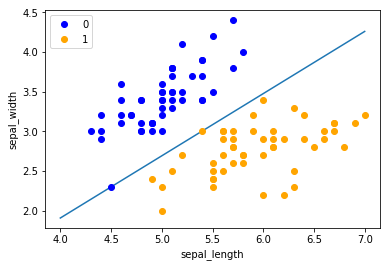

In [8]:
# 画分界线
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data.iloc[:50, 0], data.iloc[:50, 1], 'bo', color='blue', label='0')
plt.plot(data.iloc[50:100, 0], data.iloc[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()